In [1]:
import sys
sys.setrecursionlimit(2000)
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('maryland_accident_dataset_by_report_no.csv', sep=',').set_index('PERSON_ID')

In [3]:
#time에서 hour만 추출
df['HOURS']=list(map(lambda x : int(x[10:13]) ,df['TIME']))

In [4]:
#hours -> timeslot(0: 0시~6시, 1: 6시~12시, 2: 12시~18시, 3: 18~24(0))
df.loc[df["HOURS"]<6, 'HOURS']=0
df.loc[(df["HOURS"]>=6) & (df["HOURS"]<12),'HOURS']=1
df.loc[(df["HOURS"]>=12) & (df["HOURS"]<18),'HOURS']=2
df.loc[(df["HOURS"]>=18) & (df["HOURS"]<24),'HOURS']=3

In [5]:
df['JUNCTION_CODE'].unique()

array(['Non Intersection', 'Intersection Related', 'Intersection',
       'Commercial Driveway', 'Crossover Related', 'Interchange Related',
       'Railway Grade Crossing', 'Alley', 'Residential Driveway'], dtype=object)

In [6]:
# motorcycle or low speed vehicle - 1,19, 24.88, 26.88
# car - 2,3,4
# van or truck - 5,6,7,8,20,21, 22.05, 23.08, 
# bus - 8,10,11,12, 25.88, 9, 27.88
# public vehicle - 14,16,18,13,15,17

# BODY_TYPE_CODE

body_type_code_list = list(df['BODY_TYPE_CODE'])

body_type_dir = []

for i in body_type_code_list:
    if i == 'Motorcycle' or i == 'Moped' or i == 'Low Speed Vehicle' or i == 'All Terrain Vehicle (ATV)':
        body_type_dir.append("Motorcycle or Low speed vehicle")
    elif i == 'Passenger Car' or i == 'Station Wagon' or i == 'Limousine':
        body_type_dir.append("Car")
    elif i == 'Cargo Van/Light Truck 2 axles (10,000 lbs (4,536 kg) or less)'\
        or i == 'Medium/Heavy Truck 2 axles (10,000 lbs (4,536 kg) or less)' \
        or i == 'Truck Tractor' or i == 'Recreational Vehicle' or i == 'Pickup Truck'\
        or i == 'Van' or i == 'Other Light Trucks (10,000 lbs (4,536 kg))' or i == '(Sport) Utility Vehicle':
        body_type_dir.append("Van or Truck")
    elif i == 'Recreational Vehicle' or i == 'Transit Bus' or i =='Cross Country Bus' or i == 'School Bus' \
        or i == 'Other Bus' or i == 'Farm Vehicle' or i == 'Snowmobile':
        body_type_dir.append("Bus")
    elif i == 'Ambulance/Non Emergency' or i == 'Fire Vehicle/Non Emergency' or i == 'Police Vehicle/Non Emergency'\
        or i == 'Ambulance/Emergency' or i == 'Fire Vehicle/Emergency' or i == 'Police Vehicle/Emergency':
        body_type_dir.append("Public Vehicle")

df['BODY_TYPE']=body_type_dir

In [7]:
# Choose numeric columns
scaling_needed_df = df['AGE']

# 위의 컬럼들을 Scaling
scaling_needed_df = (scaling_needed_df - scaling_needed_df.mean()) / scaling_needed_df.std()

# scaled_df 에 반영
scaled_df = df.copy()
scaled_df['AGE'] = scaling_needed_df

In [8]:
scaled_df.columns

Index(['REPORT_NO', 'CDL_FLAG', 'CONDITION_CODE', 'EQUIP_PROB_CODE',
       'FAULT_FLAG', 'INJ_SEVER_CODE', 'PERSON_TYPE', 'SAF_EQUIP_CODE',
       'SEX_CODE', 'VEHICLE_ID', 'COLLISION_TYPE_CODE', 'C_M_ZONE_FLAG',
       'JUNCTION_CODE', 'LANE_CODE', 'LIGHT_CODE', 'RD_COND_CODE',
       'RD_DIV_CODE', 'SURF_COND_CODE', 'WEATHER_CODE',
       'AREA_DAMAGED_CODE_MAIN', 'BODY_TYPE_CODE', 'DAMAGE_CODE',
       'HIT_AND_RUN_FLAG', 'MOVEMENT_CODE', 'TIME', 'AGE', 'HOURS',
       'BODY_TYPE'],
      dtype='object')

In [9]:
scaled_df[ 'EQUIP_PROB_CODE'].unique()

array(['No Misuse', 'Belt(s) Misused', 'Air Bag Failed',
       'Facing Wrong Way', 'Not Strapped Right', 'Size/Type Improper',
       'Not Anchored Right', 'Belts/Anchors Broken'], dtype=object)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='white', color_codes=True)
import warnings 
warnings.filterwarnings("ignore")

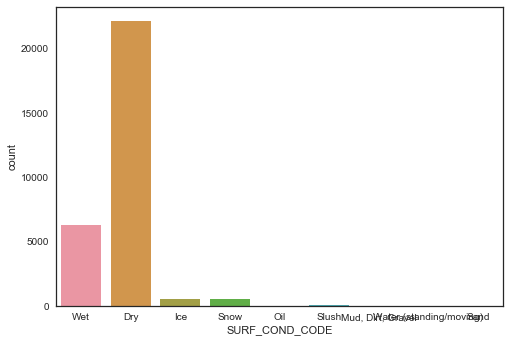

In [11]:
sns.countplot(scaled_df[ 'SURF_COND_CODE'])

#불필요한 columns 제거
processed_df=scaled_df.drop(['REPORT_NO', 'CDL_FLAG', 'CONDITION_CODE','EQUIP_PROB_CODE','FAULT_FLAG','PERSON_TYPE','SAF_EQUIP_CODE',\
                'SEX_CODE','VEHICLE_ID', 'C_M_ZONE_FLAG','BODY_TYPE_CODE', 'DAMAGE_CODE','HIT_AND_RUN_FLAG', 'TIME', 'AGE'], axis=1)

In [12]:
processed_df=scaled_df.drop(['REPORT_NO', 'CDL_FLAG','EQUIP_PROB_CODE','FAULT_FLAG','PERSON_TYPE', 
        'SAF_EQUIP_CODE','SEX_CODE', 'VEHICLE_ID', 'C_M_ZONE_FLAG', 'RD_COND_CODE','HIT_AND_RUN_FLAG',
        'TIME', 'BODY_TYPE_CODE', 'DAMAGE_CODE','AGE', 'LIGHT_CODE', 'WEATHER_CODE'], axis=1)
processed_df.columns

Index(['CONDITION_CODE', 'INJ_SEVER_CODE', 'COLLISION_TYPE_CODE',
       'JUNCTION_CODE', 'LANE_CODE', 'RD_DIV_CODE', 'SURF_COND_CODE',
       'AREA_DAMAGED_CODE_MAIN', 'MOVEMENT_CODE', 'HOURS', 'BODY_TYPE'],
      dtype='object')

#'no injury'를 제외한 경우
no_injur_df=processed_df[processed_df['INJ_SEVER_CODE']!='No Injury']
no_injur_df['INJ_SEVER_CODE'].unique()
no_injur_df1=no_injur_df.drop('INJ_SEVER_CODE', axis=1)
dummies_new_df=pd.get_dummies(no_injur_df1, columns=get_dummies_cols)
accident_new_df=dummies_new_df.copy() #no injury 불포함

In [13]:
processed_df1=processed_df.drop('INJ_SEVER_CODE', axis=1)

In [14]:
processed_df1.columns

Index(['CONDITION_CODE', 'COLLISION_TYPE_CODE', 'JUNCTION_CODE', 'LANE_CODE',
       'RD_DIV_CODE', 'SURF_COND_CODE', 'AREA_DAMAGED_CODE_MAIN',
       'MOVEMENT_CODE', 'HOURS', 'BODY_TYPE'],
      dtype='object')

In [15]:
#dummied_df
get_dummies_cols=['CONDITION_CODE', 'COLLISION_TYPE_CODE', 'JUNCTION_CODE', 'LANE_CODE',
       'RD_DIV_CODE', 'SURF_COND_CODE','MOVEMENT_CODE', 'HOURS', 'BODY_TYPE','AREA_DAMAGED_CODE_MAIN']

dummies_df=pd.get_dummies(processed_df1, columns=get_dummies_cols)
cols=list(dummies_df.columns)
len(cols)

100

In [16]:
dummies_df.describe()

,CONDITION_CODE_Apparently Asleep,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Emotional Depressed Angry Disturbed,CONDITION_CODE_Fatigued Fainted,CONDITION_CODE_Had Been Drinking,CONDITION_CODE_Ill,CONDITION_CODE_Influenced by Medications and/or Drugs and/or Alcohol,CONDITION_CODE_Other Handicaps,CONDITION_CODE_Physical Defects,CONDITION_CODE_Using Drugs,...,AREA_DAMAGED_CODE_MAIN_Non-collision,AREA_DAMAGED_CODE_MAIN_One o'clock,AREA_DAMAGED_CODE_MAIN_Roof Top,AREA_DAMAGED_CODE_MAIN_Seven o'clock,AREA_DAMAGED_CODE_MAIN_Six o'clock,AREA_DAMAGED_CODE_MAIN_Ten o'clock,AREA_DAMAGED_CODE_MAIN_Three o'clock,AREA_DAMAGED_CODE_MAIN_Twelve o'clock,AREA_DAMAGED_CODE_MAIN_Two o'clock,AREA_DAMAGED_CODE_MAIN_Underside
count,29593.000000,29593.000000,29593.000000,29593.000000,29593.000000,29593.000000,29593.000000,29593.000000,29593.00000,29593.000000,...,29593.000000,29593.000000,29593.000000,29593.000000,29593.000000,29593.000000,29593.000000,29593.000000,29593.000000,29593.000000
mean,0.002534,0.959754,0.000845,0.002467,0.026932,0.001825,0.001318,0.001284,0.00071,0.002332,...,0.003751,0.087284,0.008076,0.022573,0.239617,0.034468,0.018315,0.388673,0.032305,0.006049
std,0.050280,0.196539,0.029054,0.049606,0.161888,0.042679,0.036279,0.035812,0.02663,0.048231,...,0.061131,0.282256,0.089506,0.148540,0.426857,0.182430,0.134091,0.487457,0.176812,0.077539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
accident_df=dummies_df.copy()

In [18]:
from scipy.cluster.hierarchy import linkage
Z=linkage(accident_df, 'ward')

from scipy.cluster.hierarchy import dendrogram

In [19]:
def plot_dendrogram(title, xlabel, ylabel, Z, max_d=None, p=None):
    # Settings for figure
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Index of Data')
    plt.ylabel('Distance')

    # Dendrogram
    if p:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            truncate_mode = 'lastp',
            p=p,
            show_contracted = True
        )
    else:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

# plot dendrogram(p=4,5,6,7,8 and max_d=75,70,70,70,70)

In [20]:
from scipy.cluster.hierarchy import fcluster

In [21]:
result_df=accident_df.copy()

In [22]:
P=[4,5,6,7,8]
max_dist=[75,70,60,59,59]
z=list(zip(P, max_dist))

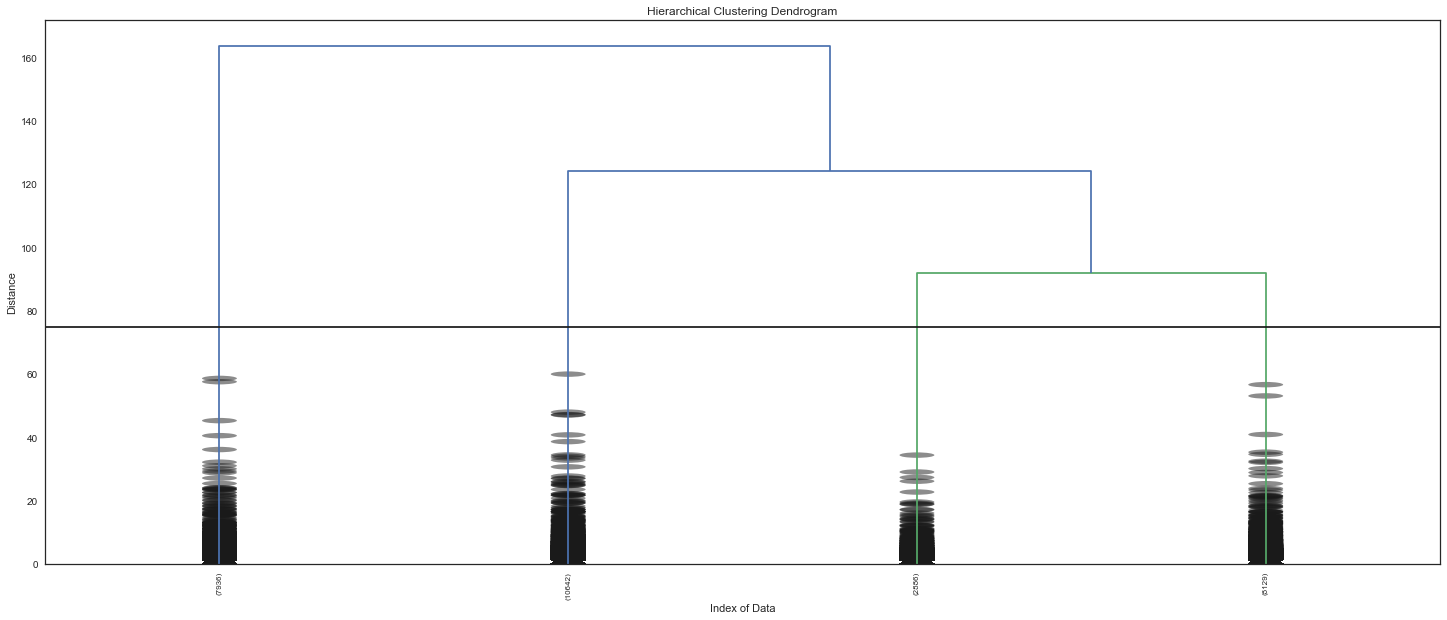

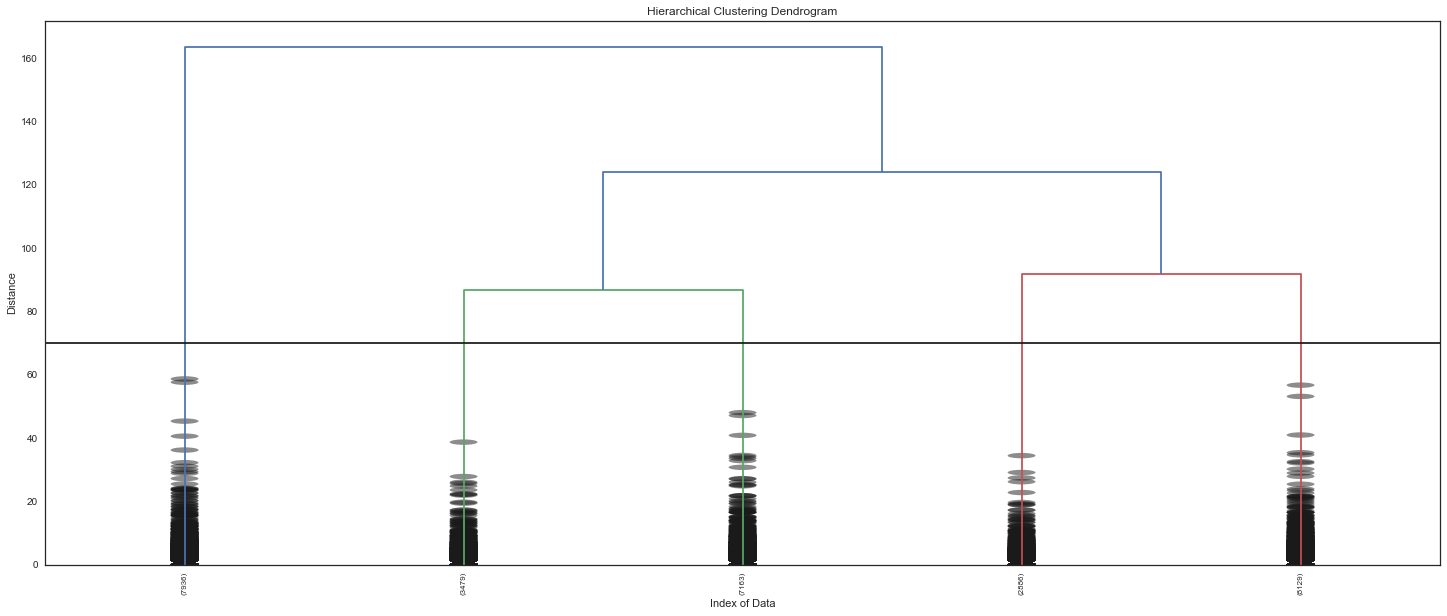

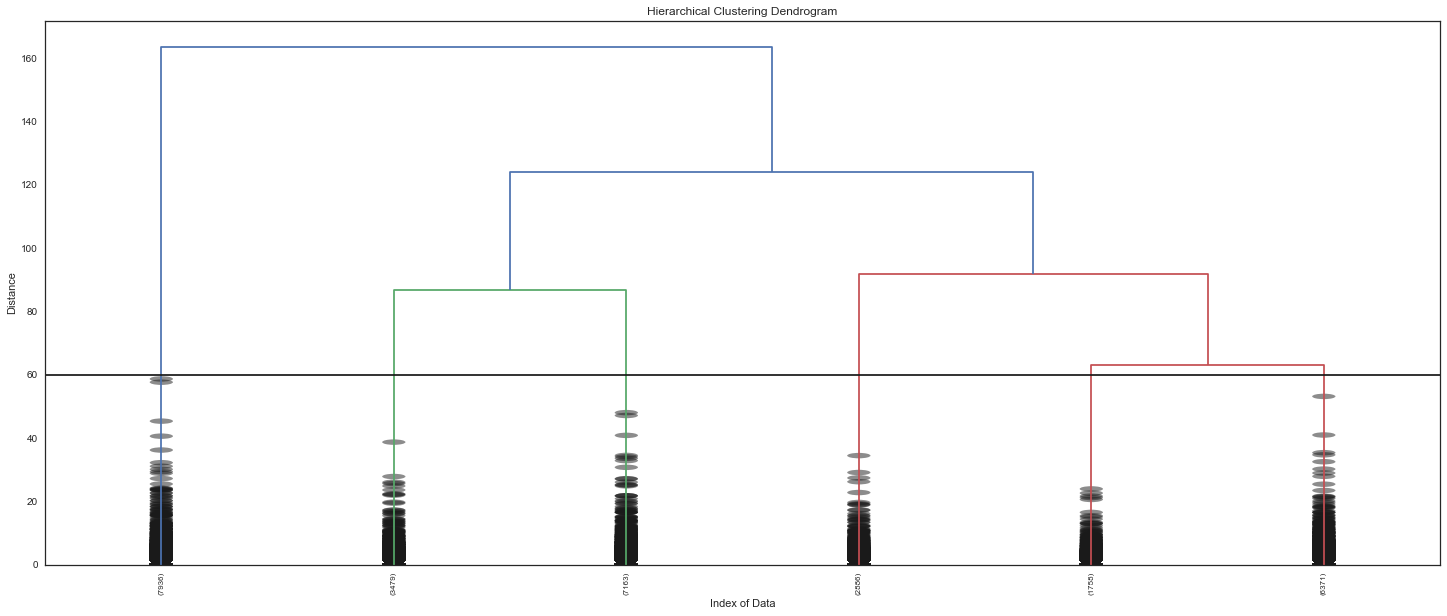

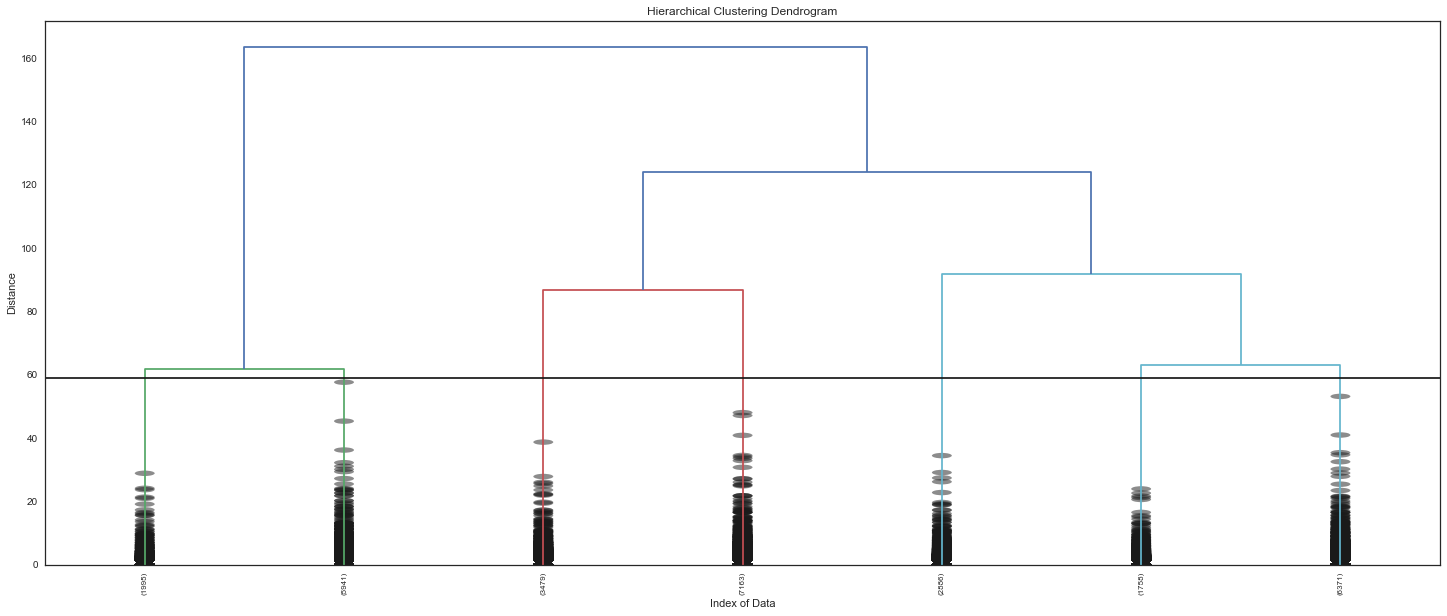

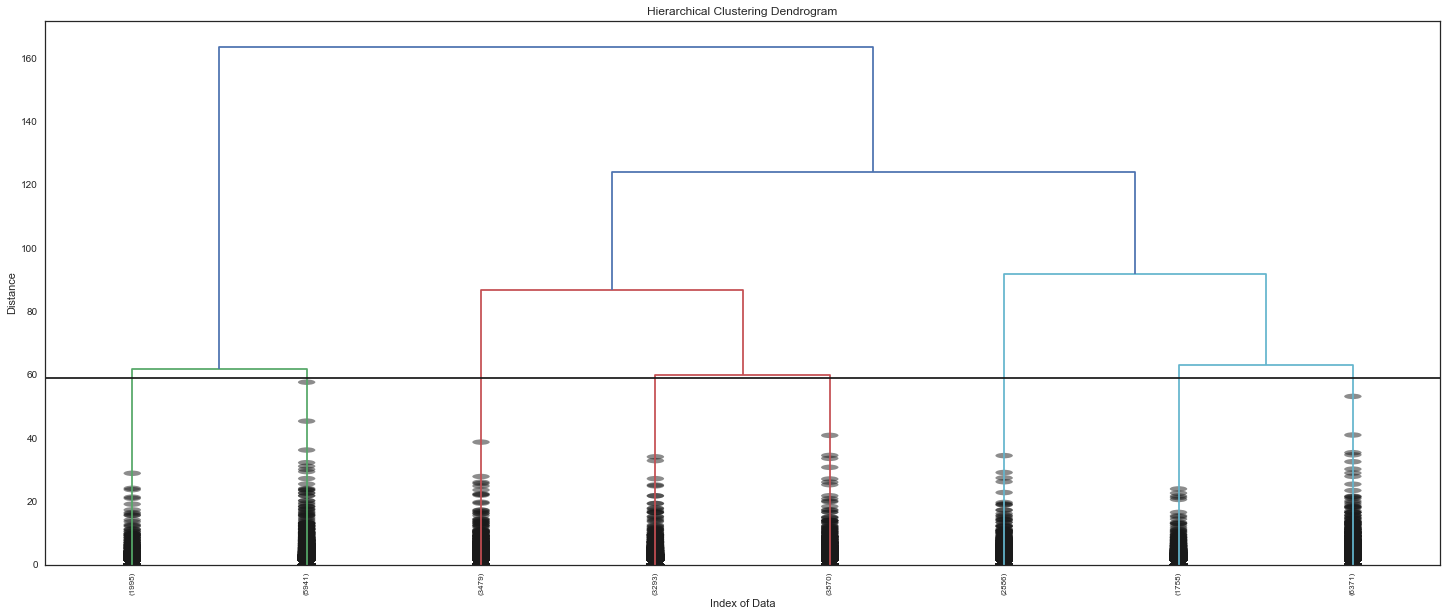

In [23]:
for p,d in z:
    plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', Z, p=p, max_d=d)
    predicted_labels_dendro=fcluster(Z, d, criterion='distance')
    result_df['scipy_labels%d' %p]=predicted_labels_dendro

# kmeans

from sklearn.cluster import KMeans

n_clusters=[4,5,6]

for i in n_clusters:
    kmeans_model=KMeans(n_clusters=i)
    kmeans_model.fit(accident_df)
    predicted_labels_kmeans=kmeans_model.labels_
    kmeans_model.fit_predict(accident_df)
    result_df['kmeans_labels%d' %i]=predicted_labels_kmeans

result_df.columns

# Silhouette Plot

from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import numpy as np

def plot_silhouette(accident_df, labels):
    cluster_labels=sorted(np.unique(labels))
    n_clusters=len(cluster_labels)
    
    plt.figure()
    
    #axis setting
    ax=plt.gca()
    ax.set_xlim([-0.5, 1])
    ax.set_ylim([0,accident_df.shape[0] + (n_clusters +1)*10])
    y_lower=10
    
    silhouette_avg=silhouette_score(accident_df, labels)
    print("k: {}".format(n_clusters))
    print("silhouette_avg: {}".format(silhouette_avg))
    data_silhouette_values=silhouette_samples(accident_df, labels)
    
    for i in cluster_labels:
        # 특정 클러스터의 silhouette 값만 추출
        ith_cluster_silhouette_values = data_silhouette_values[labels == i]
        
        # 내림차순으로 정렬
        ith_cluster_silhouette_values.sort()

        # 해당 클러스터의 크기
        size_cluster_i = len(ith_cluster_silhouette_values)
       
        # 클러스터의 silhouette을 표시할 y축 최고값 결정
        y_upper = y_lower + size_cluster_i

        # 색
        color = cm.spectral(float(i) / n_clusters)
        
        # plot silhouette
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # y축에 클러스터 이름 표시
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 클러스터의 silhouette을 표시할 최저점 조정
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for k={}".format(n_clusters))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # silhouette 평균 값을 나타내는 선
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # y축 값 제거
    ax.set_yticks([])

    plt.show() 

k_candidates=[4,5,6]
for i in k_candidates:
    ith_model=KMeans(n_clusters=i)
    labels=ith_model.fit_predict(accident_df)
    plot_silhouette(accident_df, labels)

cols=list(result_df.columns)
cols

# Range of SC	Interpretation
- 0.71-1.0	A strong structure has been found
- 0.51-0.70	A reasonable structure has been found
- 0.26-0.50	The structure is weak and could be artificial
- < 0.25	No substantial structure has been found

# Decision Tree(dedrogram p=5, max_leaf=7)

In [24]:
#split X,y
X, y=result_df.drop([ 'scipy_labels4',
 'scipy_labels5',
 'scipy_labels6',
 'scipy_labels7',
 'scipy_labels8'], axis=1), result_df.scipy_labels5

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# set parameters
class_weight = 'balanced'
max_leaf_nodes=7

In [28]:
# knn_model
dt_model = DecisionTreeClassifier(class_weight=class_weight, max_leaf_nodes=max_leaf_nodes )
dt_model

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=7,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [29]:
# fit to model
dt_model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=7,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [30]:
# get predictions
y_pred_dt = dt_model.predict(X=X_test)
y_pred_dt

array([2, 1, 1, ..., 1, 5, 3], dtype=int32)

In [31]:
# get score
dt_model.score(X=X_test, y=y_test)

0.79537775375050679

In [33]:
# result_y_test_df
result_y_test_df=pd.DataFrame(y_test)
result_y_test_df['dt'] = y_pred_dt
result_y_test_df['scipy_labels5'].unique()

array([2, 1, 5, 3, 4], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
# confusion matrix
confusion_matrix(y_pred=y_pred_dt, y_true=y_test)

array([[1740,   30,   30,   61,  123],
       [ 113,  593,   15,   84,   65],
       [  93,  134, 1094,  361,  109],
       [  21,    8,    5,  666,   22],
       [  46,   41,   33,  120, 1792]])

In [36]:
from sklearn.tree import export_graphviz

In [37]:
with open('tree.dot', 'w') as f:
    export_graphviz(dt_model, f, feature_names=result_df.columns)

In [38]:
import graphviz

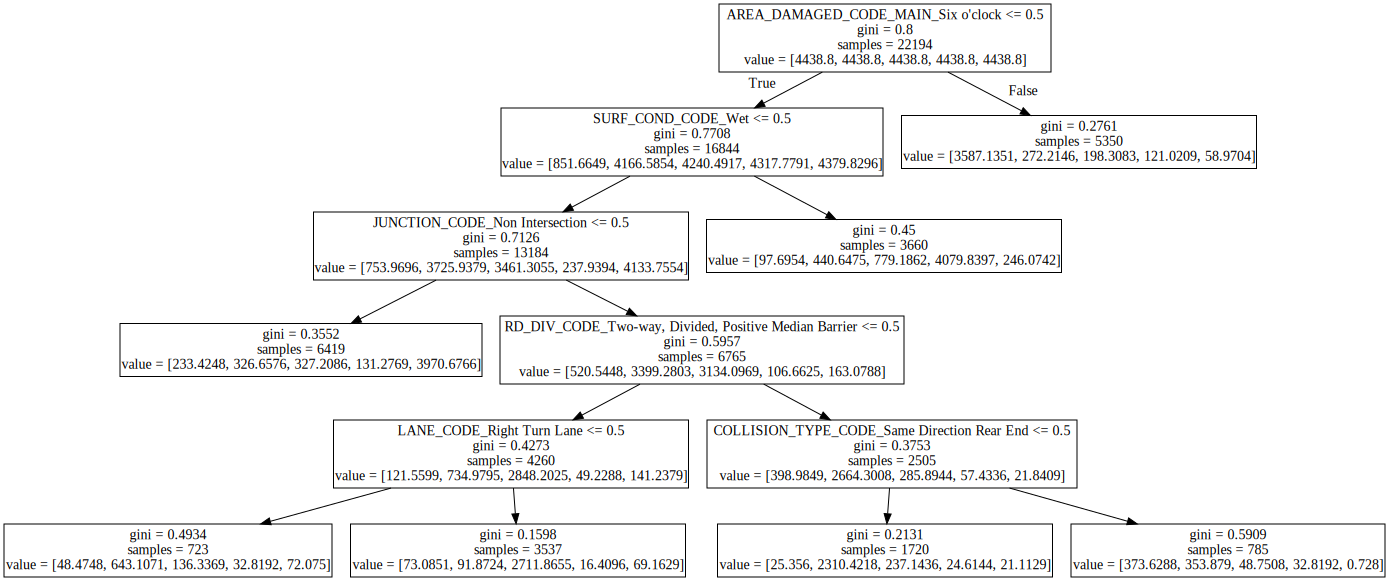

In [39]:
with open('tree.dot', 'r') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

# injury 가중치 설정 및 군집별 비교

In [40]:
final_df=result_df.drop([ 'scipy_labels4', 'scipy_labels6', 'scipy_labels7','scipy_labels8'], axis=1)

In [41]:
df['INJ_SEVER_CODE'].unique()

array(['No Injury', 'Possible Incapacitating Injury',
       'Non-incapacitating Injury', 'Incapacitating/Disabled Injury',
       'Fatal Injury'], dtype=object)

In [42]:
injured_list = list(df['INJ_SEVER_CODE'])

injuered_score = []

for i in injured_list:
    if i == 'No Injury' or i=='Non-incapacitating Injury':
        injuered_score.append(1)
    elif i == 'Possible Incapacitating Injury':
        injuered_score.append(3)
    elif i == 'Incapacitating/Disabled Injury':
        injuered_score.append(5)
    elif i == 'Fatal Injury':
        injuered_score.append(7)

final_df['INJ_SCORE']=injuered_score
final_df.columns

Index(['CONDITION_CODE_Apparently Asleep', 'CONDITION_CODE_Apparently Normal',
       'CONDITION_CODE_Emotional Depressed Angry Disturbed',
       'CONDITION_CODE_Fatigued Fainted', 'CONDITION_CODE_Had Been Drinking',
       'CONDITION_CODE_Ill',
       'CONDITION_CODE_Influenced by Medications and/or Drugs and/or Alcohol',
       'CONDITION_CODE_Other Handicaps', 'CONDITION_CODE_Physical Defects',
       'CONDITION_CODE_Using Drugs',
       ...
       'AREA_DAMAGED_CODE_MAIN_Roof Top',
       'AREA_DAMAGED_CODE_MAIN_Seven o'clock',
       'AREA_DAMAGED_CODE_MAIN_Six o'clock',
       'AREA_DAMAGED_CODE_MAIN_Ten o'clock',
       'AREA_DAMAGED_CODE_MAIN_Three o'clock',
       'AREA_DAMAGED_CODE_MAIN_Twelve o'clock',
       'AREA_DAMAGED_CODE_MAIN_Two o'clock',
       'AREA_DAMAGED_CODE_MAIN_Underside', 'scipy_labels5', 'INJ_SCORE'],
      dtype='object', length=102)

In [43]:
grouped_df=final_df.groupby('scipy_labels5')

In [44]:
final_df.groupby(['INJ_SCORE','scipy_labels5']).count().iloc[:,0]

INJ_SCORE  scipy_labels5
1          1                7234
           2                3163
           3                6122
           4                2564
           5                7119
3          1                 672
           2                 287
           3                 924
           4                 303
           5                 940
5          1                  28
           2                  28
           3                 102
           4                  17
           5                  64
7          1                   2
           2                   1
           3                  15
           4                   2
           5                   6
Name: CONDITION_CODE_Apparently Asleep, dtype: int64